# Part 5. Policy Analysis

## Import basic libraries and load data

This section import the basic python libraries for usage as well as loading the dataset.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
data_df = pd.read_csv('./datasets/merge_data_with_amenities_final_baseyear2014.csv')

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210180 entries, 0 to 210179
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     210180 non-null  object 
 1   town                     210180 non-null  object 
 2   flat_type                210180 non-null  object 
 3   block                    210180 non-null  object 
 4   street_name              210180 non-null  object 
 5   storey_range             210180 non-null  object 
 6   floor_area_sqm           210180 non-null  float64
 7   flat_model               210180 non-null  object 
 8   lease_commence_date      210180 non-null  int64  
 9   resale_price             210180 non-null  float64
 10  year                     210180 non-null  int64  
 11  month                    210180 non-null  int64  
 12  longitude                210180 non-null  float64
 13  latitude                 210180 non-null  float64
 14  near

## QNS 3A - Are Yishun the cheapest flat in the country?
In this section, the median resale price was plotted using a boxplot to check if Yishun has the cheapest transaction price.

In [28]:
def create_boxplot(df, var, target):
#     rows = round(len(list_columns)/1)
#     fig, ax = plt.subplots(rows, 1, figsize=(30, 75))
#     ax = ax.ravel()
#     for idx, feature in enumerate(list_columns):
        # get the index(key) to access the median; sorted by median score in desc order
    plt.figure(figsize=(16, 10))
    my_order = df.groupby(var)[target].median().sort_values(ascending=False).index
    #             print(feature)
        
    bp = sns.boxplot(
            data=df,
            x=var,#target,
            y=target,#feature,
#             hue=feature,
#             ax=ax[idx],
            order=my_order
    )
    bp.set_xlabel(var, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    bp.set_ylabel('Mediam Resale Price', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    bp.set_title(f'Median Resale Price vs {var}', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
#         plt.xticks(rotation=90)
#     if len(list_columns) % 3 != 0:
#         ax.flat[-1].set_visible(False)

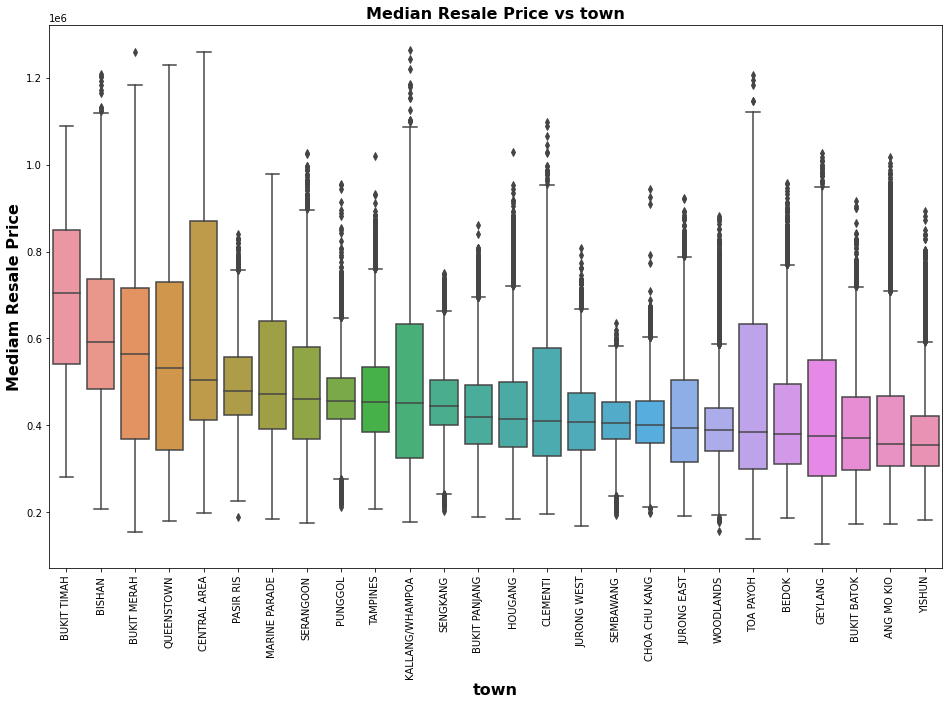

In [29]:
create_boxplot(data_df, 'town', 'inflated_resale_price')

### Conclusion

Answer to Question 3A:
From the boxplot above, we can see that Yishun resale price has the lowest median resale price. Hence, Yishun is the town with the cheapest flats in the country.

## QNS 3B - Are flat size getting smaller over the years?
In this section, a scatterplot was plotted to see the relationship between the flat age and the flat size.

In [30]:
data_df.head()

,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month,longitude,latitude,nearest_dist_to_mrt,nearest_mrt,nearest_dist_to_pri_sch,nearest_pri_sch,nearest_dist_to_sec_sch,nearest_sec_sch,age,avg_floor,inflated_rate,inflated_resale_price
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012,3,103.836463,1.374694,0.359905,MAYFLOWER,0.694315,ANG MO KIO PRIMARY SCHOOL,0.725368,MAYFLOWER SECONDARY SCHOOL,26,8,0.939597,234899.33
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012,3,103.849073,1.373401,0.389857,ANG MO KIO,0.364449,JING SHAN PRIMARY SCHOOL,0.295248,ANDERSON SECONDARY SCHOOL,32,3,0.939597,248993.29
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,2012,3,103.839157,1.379395,0.695977,YIO CHU KANG,0.566276,MAYFLOWER PRIMARY SCHOOL,0.367333,YIO CHU KANG SECONDARY SCHOOL,32,8,0.939597,295973.15
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,2012,3,103.858015,1.362758,1.234544,ANG MO KIO,0.556287,TOWNSVILLE PRIMARY SCHOOL,0.707555,DEYI SECONDARY SCHOOL,28,3,0.939597,300671.14
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,2012,3,103.835977,1.379867,0.628442,LENTOR,0.776527,ANDERSON PRIMARY SCHOOL,0.717216,YIO CHU KANG SECONDARY SCHOOL,32,8,0.939597,301610.74


In [31]:
data_df['age_2022'] = 2022 - data_df['lease_commence_date']
data_df.head()

,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month,longitude,latitude,nearest_dist_to_mrt,nearest_mrt,nearest_dist_to_pri_sch,nearest_pri_sch,nearest_dist_to_sec_sch,nearest_sec_sch,age,avg_floor,inflated_rate,inflated_resale_price,age_2022
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012,3,103.836463,1.374694,0.359905,MAYFLOWER,0.694315,ANG MO KIO PRIMARY SCHOOL,0.725368,MAYFLOWER SECONDARY SCHOOL,26,8,0.939597,234899.33,36
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012,3,103.849073,1.373401,0.389857,ANG MO KIO,0.364449,JING SHAN PRIMARY SCHOOL,0.295248,ANDERSON SECONDARY SCHOOL,32,3,0.939597,248993.29,42
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,2012,3,103.839157,1.379395,0.695977,YIO CHU KANG,0.566276,MAYFLOWER PRIMARY SCHOOL,0.367333,YIO CHU KANG SECONDARY SCHOOL,32,8,0.939597,295973.15,42
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,2012,3,103.858015,1.362758,1.234544,ANG MO KIO,0.556287,TOWNSVILLE PRIMARY SCHOOL,0.707555,DEYI SECONDARY SCHOOL,28,3,0.939597,300671.14,38
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,2012,3,103.835977,1.379867,0.628442,LENTOR,0.776527,ANDERSON PRIMARY SCHOOL,0.717216,YIO CHU KANG SECONDARY SCHOOL,32,8,0.939597,301610.74,42


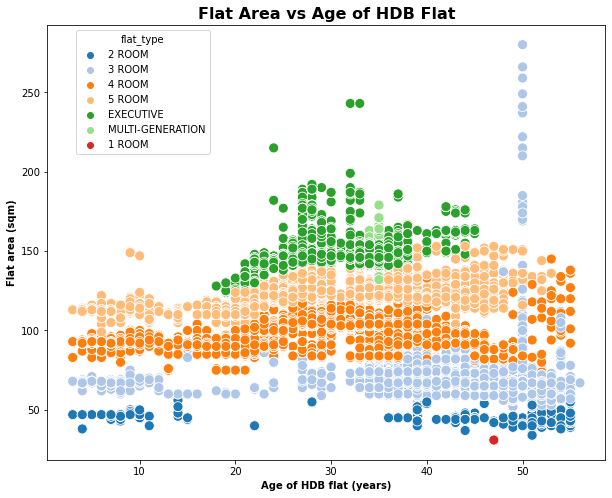

In [45]:
plt.figure(figsize=(10, 8))
sp = sns.scatterplot(data=data_df, x="age_2022", y="floor_area_sqm", hue='flat_type', palette="tab20", s=100)
# plt.legend(title='Team', , title_fontsize='14')
sp.set_title('Flat Area vs Age of HDB Flat', fontsize='16', fontweight='bold')
sp.set_xlabel('Age of HDB flat (years)', fontweight='bold')
sp.set_ylabel('Flat area (sqm)', fontweight='bold')
sp.legend(ncol=1, bbox_to_anchor=(0.3, 1), fontsize='10', title='flat_type');

### Conclusion

Answer to Question 3B:
From the scatterplot above, we can see that the flat age and flat size has an inversely relationship between them. Hence, it can be seen that along the years, the size of the flat has become smaller.

## QNS 3B - Have prices increased in Bukit Panjang after operation of Downtown line?
Since the operation of the Downtown line operated in December 2015 for Bukit Panjang. The data was splitted into 2 sets: before year 2016 and year 2016 onwards. Median resale price was plotted for all the years to see if there is an increase from 2016 onwards for Bukit Panjang.

In [242]:
data_b4_2016_bp_df = data_df.loc[(data_df['year'] < 2016) & (data_df['town'] == 'BUKIT PANJANG'), :]
data_b4_2016_bp_df.head(10)

,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month,longitude,latitude,nearest_dist_to_mrt,nearest_mrt,nearest_dist_to_pri_sch,nearest_pri_sch,nearest_dist_to_sec_sch,nearest_sec_sch,age,avg_floor,inflated_rate,inflated_resale_price,age_2022
515,2012-03-01,BUKIT PANJANG,3 ROOM,105,GANGSA RD,01 TO 05,70.0,Simplified,1987,320000.0,2012,3,103.767763,1.378312,0.697430,BUKIT PANJANG,0.220722,ZHENGHUA PRIMARY SCHOOL,0.516454,FAJAR SECONDARY SCHOOL,25,3,0.939597,300671.14,35
516,2012-03-01,BUKIT PANJANG,3 ROOM,118,PENDING RD,06 TO 10,73.0,Model A,1988,340000.0,2012,3,103.768464,1.376804,0.809040,BUKIT PANJANG,0.319870,ZHENGHUA PRIMARY SCHOOL,0.514695,FAJAR SECONDARY SCHOOL,24,8,0.939597,319463.09,34
517,2012-03-01,BUKIT PANJANG,3 ROOM,143,PETIR RD,01 TO 05,73.0,Model A,1988,346000.0,2012,3,103.767324,1.376374,0.707627,BUKIT PANJANG,0.382109,BUKIT PANJANG PRIMARY SCHOOL,0.380019,FAJAR SECONDARY SCHOOL,24,3,0.939597,325100.67,34
518,2012-03-01,BUKIT PANJANG,3 ROOM,206,PETIR RD,11 TO 15,73.0,Model A,1989,350000.0,2012,3,103.774114,1.373734,1.161785,CASHEW,0.527582,BUKIT PANJANG PRIMARY SCHOOL,0.905735,GREENRIDGE SECONDARY SCHOOL,23,13,0.939597,328859.06,33
519,2012-03-01,BUKIT PANJANG,4 ROOM,482,SEGAR RD,01 TO 05,91.0,Premium Apartment,2002,378000.0,2012,3,103.772292,1.389161,1.646961,BUKIT PANJANG,0.599082,BEACON PRIMARY SCHOOL,0.759916,ZHENGHUA SECONDARY SCHOOL,10,3,0.939597,355167.79,20
520,2012-03-01,BUKIT PANJANG,4 ROOM,241,BT PANJANG RING RD,01 TO 05,104.0,Model A,1988,380000.0,2012,3,103.771871,1.379717,1.153150,BUKIT PANJANG,0.285287,ZHENGHUA PRIMARY SCHOOL,0.323429,GREENRIDGE SECONDARY SCHOOL,24,3,0.939597,357046.98,34
521,2012-03-01,BUKIT PANJANG,4 ROOM,510,JELAPANG RD,11 TO 15,90.0,Model A2,1998,385000.0,2012,3,103.768983,1.387589,1.265321,BUKIT PANJANG,0.230883,GREENRIDGE PRIMARY SCHOOL,0.396023,ZHENGHUA SECONDARY SCHOOL,14,13,0.939597,361744.97,24
522,2012-03-01,BUKIT PANJANG,4 ROOM,518,JELAPANG RD,06 TO 10,102.0,Model A,1998,390000.0,2012,3,103.766924,1.387033,1.076629,BUKIT PANJANG,0.159964,GREENRIDGE PRIMARY SCHOOL,0.216290,ZHENGHUA SECONDARY SCHOOL,14,8,0.939597,366442.95,24
523,2012-03-01,BUKIT PANJANG,4 ROOM,250,BANGKIT RD,01 TO 05,103.0,Model A,1988,390000.0,2012,3,103.773699,1.380655,1.366239,BUKIT PANJANG,0.366837,BEACON PRIMARY SCHOOL,0.135407,GREENRIDGE SECONDARY SCHOOL,24,3,0.939597,366442.95,34
524,2012-03-01,BUKIT PANJANG,4 ROOM,501,JELAPANG RD,01 TO 05,102.0,Model A,1998,392000.0,2012,3,103.766847,1.382882,0.732222,BUKIT PANJANG,0.350979,GREENRIDGE PRIMARY SCHOOL,0.628352,ZHENGHUA SECONDARY SCHOOL,14,3,0.939597,368322.15,24


In [269]:
data_bp_b4_2016 = data_b4_2016_bp_df.groupby('year')['inflated_resale_price'].median().to_list()
year_b4_2016 = list(range(2012, 2016))

In [248]:
data_2016_onwards_bp_df = data_df.loc[(data_df['year'] >= 2016) & (data_df['town'] == 'BUKIT PANJANG'), :]
data_2016_onwards_bp_df.head(10)

,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month,longitude,latitude,nearest_dist_to_mrt,nearest_mrt,nearest_dist_to_pri_sch,nearest_pri_sch,nearest_dist_to_sec_sch,nearest_sec_sch,age,avg_floor,inflated_rate,inflated_resale_price,age_2022
70245,2016-01-01,BUKIT PANJANG,3 ROOM,206,PETIR RD,01 TO 03,73.0,Model A,1989,270000.0,2016,1,103.774114,1.373734,1.161785,CASHEW,0.527582,BUKIT PANJANG PRIMARY SCHOOL,0.905735,GREENRIDGE SECONDARY SCHOOL,27,2,1.02439,276585.37,33
70246,2016-01-01,BUKIT PANJANG,3 ROOM,227,PENDING RD,04 TO 06,73.0,Model A,1989,272000.0,2016,1,103.771466,1.374960,0.969391,CASHEW,0.276361,BUKIT PANJANG PRIMARY SCHOOL,0.812417,GREENRIDGE SECONDARY SCHOOL,27,5,1.02439,278634.15,33
70247,2016-01-01,BUKIT PANJANG,3 ROOM,205,PETIR RD,04 TO 06,73.0,Model A,1988,272000.0,2016,1,103.773924,1.373430,1.129766,CASHEW,0.506768,BUKIT PANJANG PRIMARY SCHOOL,0.939036,GREENRIDGE SECONDARY SCHOOL,28,5,1.02439,278634.15,34
70248,2016-01-01,BUKIT PANJANG,3 ROOM,220,PETIR RD,10 TO 12,73.0,Model A,1989,275000.0,2016,1,103.772867,1.374528,1.074794,CASHEW,0.401571,BUKIT PANJANG PRIMARY SCHOOL,0.823700,GREENRIDGE SECONDARY SCHOOL,27,11,1.02439,281707.32,33
70249,2016-01-01,BUKIT PANJANG,3 ROOM,149,PETIR RD,01 TO 03,73.0,Model A,1988,280000.0,2016,1,103.766708,1.376746,0.628114,BUKIT PANJANG,0.426040,ZHENGHUA PRIMARY SCHOOL,0.327349,FAJAR SECONDARY SCHOOL,28,2,1.02439,286829.27,34
70250,2016-01-01,BUKIT PANJANG,3 ROOM,252,BANGKIT RD,04 TO 06,73.0,Model A,1989,290000.0,2016,1,103.774058,1.379953,1.397842,BUKIT PANJANG,0.447395,BEACON PRIMARY SCHOOL,0.214277,GREENRIDGE SECONDARY SCHOOL,27,5,1.02439,297073.17,33
70251,2016-01-01,BUKIT PANJANG,3 ROOM,118,PENDING RD,01 TO 03,73.0,Model A,1988,296000.0,2016,1,103.768464,1.376804,0.809040,BUKIT PANJANG,0.319870,ZHENGHUA PRIMARY SCHOOL,0.514695,FAJAR SECONDARY SCHOOL,28,2,1.02439,303219.51,34
70252,2016-01-01,BUKIT PANJANG,3 ROOM,148,GANGSA RD,07 TO 09,73.0,Model A,1988,300000.0,2016,1,103.766192,1.375919,0.621654,BUKIT PANJANG,0.436929,BUKIT PANJANG PRIMARY SCHOOL,0.246626,FAJAR SECONDARY SCHOOL,28,8,1.02439,307317.07,34
70253,2016-01-01,BUKIT PANJANG,4 ROOM,466,SEGAR RD,01 TO 03,90.0,Premium Apartment,2002,300000.0,2016,1,103.773299,1.386943,1.579834,BUKIT PANJANG,0.335333,BEACON PRIMARY SCHOOL,0.568469,GREENRIDGE SECONDARY SCHOOL,14,2,1.02439,307317.07,20
70254,2016-01-01,BUKIT PANJANG,4 ROOM,244,BT PANJANG RING RD,01 TO 03,104.0,Model A,1988,307000.0,2016,1,103.771819,1.380920,1.164347,BUKIT PANJANG,0.317905,ZHENGHUA PRIMARY SCHOOL,0.247125,GREENRIDGE SECONDARY SCHOOL,28,2,1.02439,314487.80,34


In [263]:
data_bp_2016_onwards = data_2016_onwards_bp_df.groupby('year')['inflated_resale_price'].median().to_list()
year_2016_onwards = list(range(2016, 2023))

In [290]:
def create_barplot(x_value, y_value):
#     x_value =[]
#     y_value = []
#     for feature in features_list:
#         x_value.append(feature[0])
#         y_value.append(feature[1])
    
    plt.figure(figsize=(10, 10))
    bp = sns.barplot(
                # y to specify list of category
                y=y_value, 
                # x to specify the data to the list of category
                x=x_value,
     
        )

    bp.set_xlabel('Year', fontdict={'fontsize':12, 'fontweight': 'bold'})
    bp.set_ylabel('Median Resale Price', fontdict={'fontsize':12, 'fontweight': 'bold'})
    bp.set_title('Median Resale Price vs Year', fontdict={'fontsize':16, 'fontweight': 'bold'})
    
    bp.bar_label(bp.containers[0])
    
    plt.show()

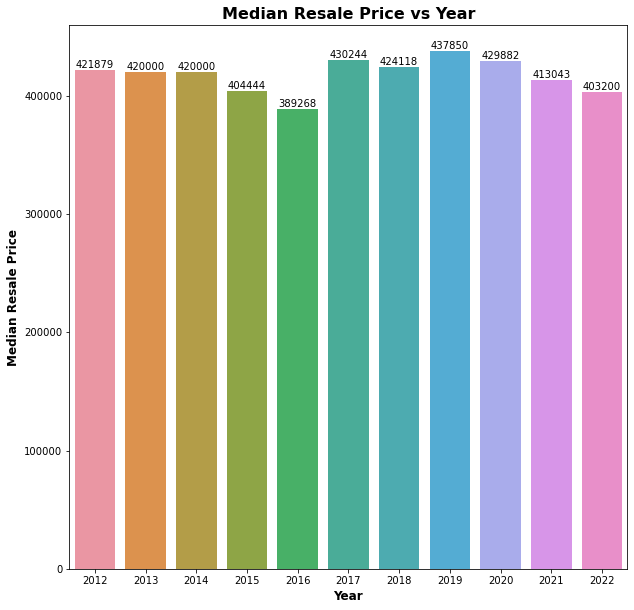

In [291]:
create_barplot(year_b4_2016+year_2016_onwards, data_bp_b4_2016+data_bp_2016_onwards)

### Conclusion

Answer to Question 3C:
From the barplot above, we can see that there was a slight increase in the median resale price after the operation of the downtown line for Bukit Panjang.